In [26]:
# https://www.kaggle.com/c/nlp-getting-started/data

# Things to do with NLTK:

* Stop word removal
* Filtering and cleaning
* Feature selection and engineering

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
import string
from  nltk import FreqDist

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
true=df_train[df_train['target']==1]
false=df_train[df_train['target']==0]

### creating stopwords list

In [76]:
# remove stop words and punctuation from this one tweet
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['the', 'I', 'i', 'A', 'http', 'https', '0', '1', '2', '3', '4', 
                   '5', '6', '7', '8', '9','@', '‘','said','says', "'s",'”',
                   '“', ':', '#', 'a', '...', "'nt", "n't", 'like', 'amp', 'via'] #Miscelleneous and numerical characters

In [77]:
# Capitalizing words
count = 0
for i in stopwords_list: 
    cap = i.capitalize()
    upper = i.upper()
    stopwords_list.append(cap)
    stopwords_list.append(upper)
    count += 1
    if count > 488:
        break

### tokenizing

In [13]:
tokenized_true = true['text'].apply(nltk.word_tokenize) #Tokenizing 
tokenized_false = false['text'].apply(nltk.word_tokenize)

In [14]:
tokenized_true

0       [Our, Deeds, are, the, Reason, of, this, #, ea...
1        [Forest, fire, near, La, Ronge, Sask, ., Canada]
2       [All, residents, asked, to, 'shelter, in, plac...
3       [13,000, people, receive, #, wildfires, evacua...
4       [Just, got, sent, this, photo, from, Ruby, #, ...
                              ...                        
7608    [Two, giant, cranes, holding, a, bridge, colla...
7609    [@, aria_ahrary, @, TheTawniest, The, out, of,...
7610    [M1.94, [, 01:04, UTC, ], ?, 5km, S, of, Volca...
7611    [Police, investigating, after, an, e-bike, col...
7612    [The, Latest, :, More, Homes, Razed, by, North...
Name: text, Length: 3271, dtype: object

### Removing stop words

In [78]:
true_tokens=[] #Use this to take out all of the stop words 
for x in tokenized_true:
    for y in x:
        if y not in stopwords_list:
            true_tokens.append(y.lower())

In [79]:
false_tokens=[] #Use this to take out all of the stop words 
for x in tokenized_false:
    for y in x:
        if y not in stopwords_list:
            false_tokens.append(y.lower())

### frequency distribution

In [86]:
FreqDist_true = dict(FreqDist(true_tokens).most_common(10)) #Freq Dist of the token values for positive values
FreqDist_true

{'fire': 177,
 'news': 140,
 'disaster': 118,
 'california': 111,
 'police': 106,
 'people': 104,
 'suicide': 104,
 'killed': 93,
 'hiroshima': 87,
 'storm': 86}

In [91]:
FreqDist_true.keys()

dict_keys(['fire', 'news', 'disaster', 'california', 'police', 'people', 'suicide', 'killed', 'hiroshima', 'storm'])

Text(0.5,1,'Top 10 Disaster Words')

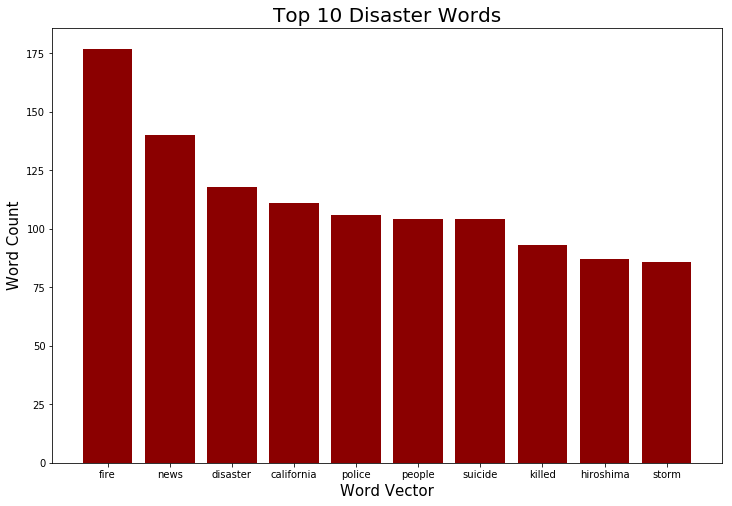

In [105]:
# Plot top 10 disaster words
plt.figure(figsize=(12,8)) #Figsize
plt.bar(FreqDist_true.keys(),
        FreqDist_true.values(),
        color='darkred') #Bar graph
plt.tick_params(labelsize=10)
plt.xlabel('Word Vector',size=15) #X label
plt.ylabel('Word Count',size=15) #Y label
plt.title('Top 10 Disaster Words', size=20) #Title

In [84]:
#Freq Dist of the token values for positive values

FreqDist_false = dict(FreqDist(false_tokens).most_common(10)) 
FreqDist_false

{"'m": 203,
 'new': 164,
 'get': 162,
 'one': 129,
 'body': 111,
 'would': 104,
 'video': 96,
 'people': 93,
 'got': 92,
 'love': 89}